##**Online Retail Analysis**
#### 1. Introduction: This project analyzes the Online Retail II Dataset to identify trends, peak seasons, and customer purchase behavior.

#### 2. Data Import and Cleaning:
Here, we clean and preprocess the dataset for analysis.

In [4]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
df = pd.read_csv('/content/online_retail_II.csv', encoding='latin-1')

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [7]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Convert 'Quantity' to integer
df['Quantity'] = df['Quantity'].astype(int)

# Convert 'Price' to float
df['Price'] = df['Price'].astype(float)

In [8]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [9]:
#calculating IQR
Q1=df['Quantity'].quantile(0.25)
Q3=df['Quantity'].quantile(0.75)
IQR= Q3-Q1

In [10]:
#removing outliers
df=df[~((df['Quantity']<(Q1-1.5*IQR))|(df['Quantity']>(Q3+1.5*IQR)))]

In [11]:
#dropping the duplicates
df.drop_duplicates(inplace=True)

In [12]:
#create 'Revenueolumn
df['Revenue'] = df['Quantity']*df['Price']

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6


In [13]:
# Filter out negative monetary values
df = df[df['Revenue'] >= 0]

# Check if negative values are removed
print(df['Revenue'].describe())

count    407081.000000
mean         14.325085
std          69.697892
min          -0.000000
25%           3.900000
50%          10.000000
75%          17.000000
max       25111.090000
Name: Revenue, dtype: float64


#### 3. Data Aggregation:
Now that the data is clean and well-structured, we can aggregate it to derive useful insights.

In [14]:
#sales per month
df['Month']=df['InvoiceDate'].dt.month
sales_per_month = df.groupby('Month')['Revenue'].sum()
print(sales_per_month)

df.head()

Month
1     400812.092
2     362778.006
3     562702.321
4     456391.232
5     446786.630
6     515040.790
7     425465.900
8     427044.890
9     587309.561
10    797232.120
11    285965.101
12    563941.280
Name: Revenue, dtype: float64


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6,12


In [15]:
#sales per year
df['Year']=df['InvoiceDate'].dt.year
sales_per_year = df.groupby('Year')['Revenue'].sum()
print(sales_per_year)

df.head()

Year
2009     563941.280
2010    5267528.643
Name: Revenue, dtype: float64


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12,2009
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6,12,2009


In [16]:
#top selling products
top_selling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_selling_products)

Description
PACK OF 72 RETRO SPOT CAKE CASES      17905
WHITE HANGING HEART T-LIGHT HOLDER    16283
60 TEATIME FAIRY CAKE CASES           14714
PACK OF 60 PINK PAISLEY CAKE CASES    12169
STRAWBERRY CERAMIC TRINKET BOX        12151
ASSORTED COLOUR BIRD ORNAMENT         11581
LUNCH BAG RED SPOTTY                   8836
HANGING HEART ZINC T-LIGHT HOLDER      8354
PACK OF 72 SKULL CAKE CASES            8130
72 SWEETHEART FAIRY CAKE CASES         7874
Name: Quantity, dtype: int64


In [17]:
#top customers
top_customers=df.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_customers)

Customer ID
14911.0    118025.76
14156.0     52892.76
17850.0     45232.66
13089.0     32725.47
15311.0     26674.69
17841.0     23854.62
13093.0     20413.75
13081.0     20339.64
14298.0     19795.58
14646.0     18176.90
Name: Revenue, dtype: float64


####4. Exploratory Data Analysis (EDA):
Now that the data is cleaned and aggregated, we can move on with the Data Visualization.

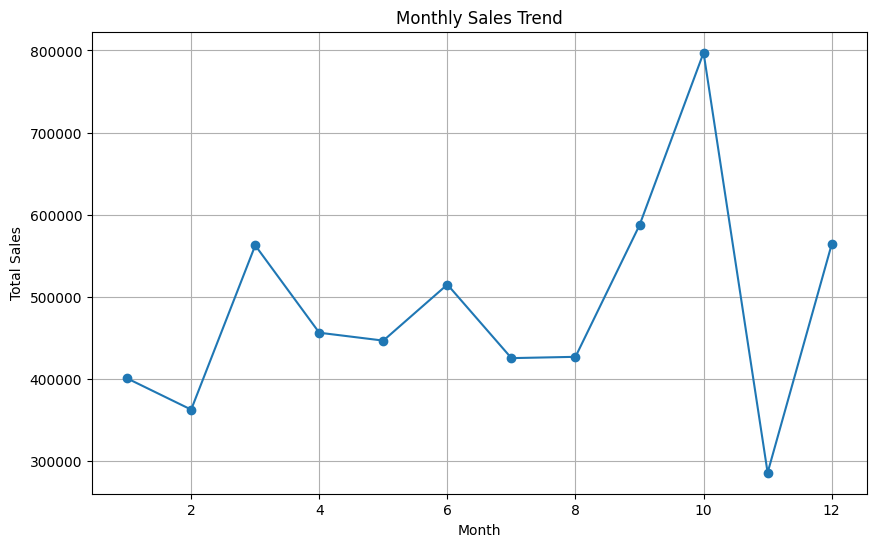

In [18]:
#visualize sales over months
plt.figure(figsize=(10,6))
plt.plot(sales_per_month.index, sales_per_month.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

The data indicates fluctuations in sales throughout the year, with peaks and valleys that suggest varying sales performance across different months. The trend line highlights a significant **increase in sales towards the end of the year, particularly in the final quarter**.

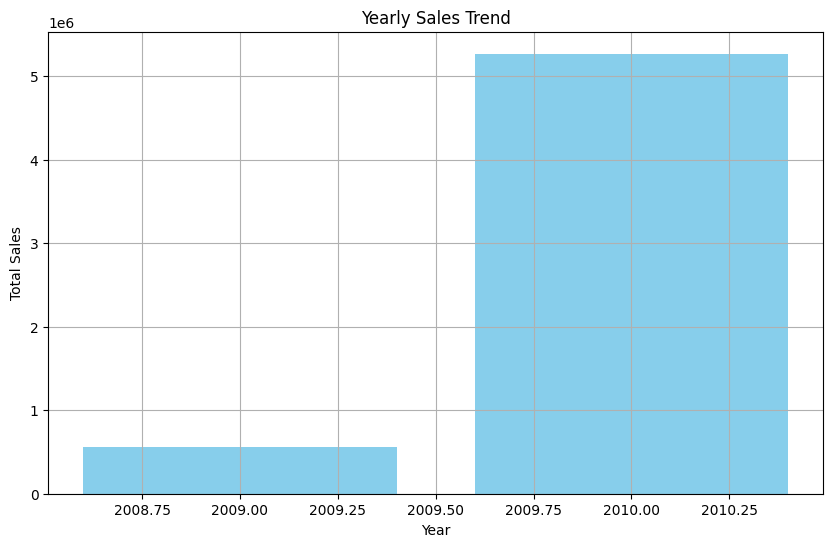

In [19]:
#visualize sales over years
plt.figure(figsize=(10,6))
plt.bar(sales_per_year.index, sales_per_year.values, color='skyblue')
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

The graph shows a significant and consistent increase in yearly sales, starting around **0.3 million in 2009** and reaching over **5 million by 2010**.

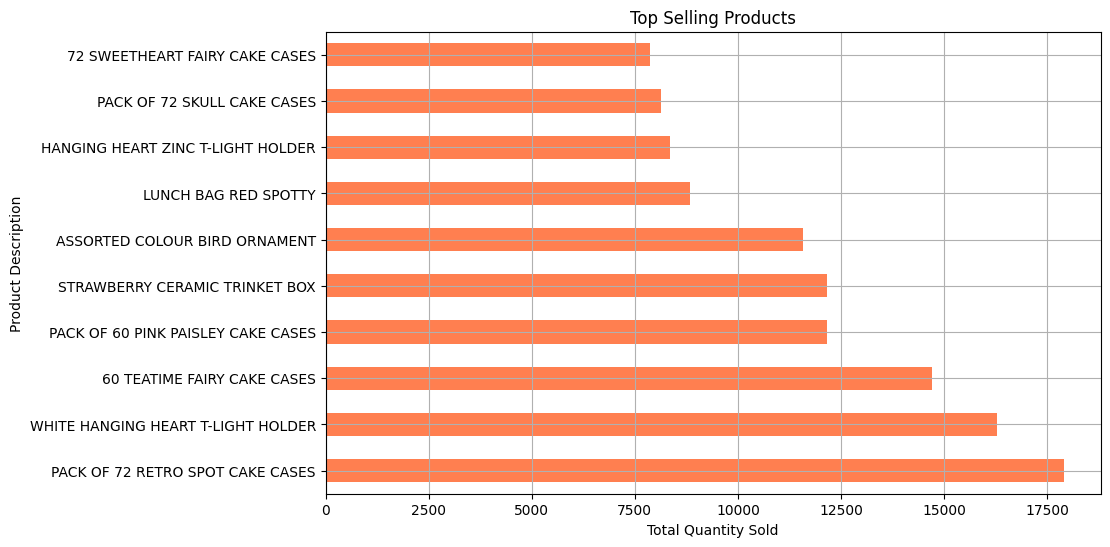

In [20]:
#horizontal bar plot to display top selling products
plt.figure(figsize=(10,6))
top_selling_products.plot(kind='barh', color='coral')
plt.title("Top Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.grid(True)
plt.show()

The top selling product based on total quantity sold is the **WHITE HANGING HEART T-LIGHT HOLDER**, with almost **17,500 units sold**, followed by the ASSORTED COLOUR BIRD ORNAMENT and the STRAWBERRY CERAMIC TRINKET BOX, both of which have sold over 10,000 units.

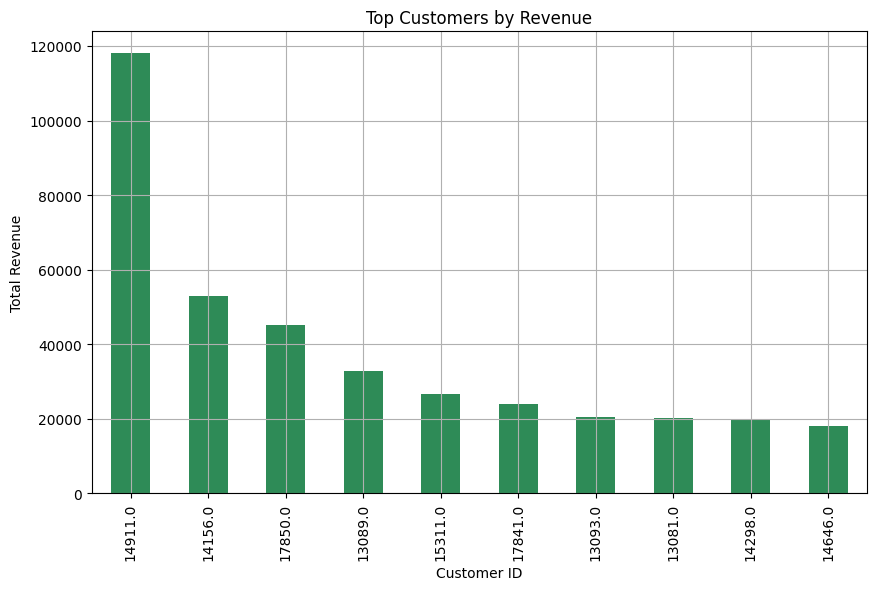

In [21]:
#top customers by revenue
plt.figure(figsize=(10,6))
top_customers.plot(kind='bar', color= 'seagreen')
plt.title("Top Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

Based on the graph, it is clear that **Customer ID 14911.0 is the company's top customer**, generating over **100,000 in total revenue**. The next two highest revenue-generating customers are Customer ID 14156.0 and Customer ID 17850.0, with revenue in the 50,000-60,000 range.

In [22]:
#Geographic Visualization of sales
import plotly.express as px

# Aggregate sales by country
country_sales = df.groupby('Country')['Revenue'].sum().reset_index()

# Plot choropleth map
fig = px.choropleth(country_sales, locations='Country', locationmode='country names',
                    color='Revenue', title='Revenue by Country', color_continuous_scale='Viridis')
fig.show()

Based on the Geographic Visualization, it appears that the company generates the highest revenues from countries in **North America, South America, and Europe**, which are shaded in the darkest purple color. Out of all the countries, the company generates its most of the revenues from **United Kingdom** (**Over 5M**). These regions seem to be the company's key revenue drivers.

The map also suggests the company has a decent global sales presence, with revenue contributions from countries across multiple continents, though the revenue levels vary significantly between regions.

In [26]:
import plotly.io as pio

# Assuming `fig` is your Plotly figure
pio.write_html(fig, file="Geographic_Viz.html")

from google.colab import files
files.download("Geographic_Viz.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>